# Import libraries

In [1]:
from nbconvert import PythonExporter
import nbformat
import sys
import os
import numpy as np
import pandas as pd
from helpers import parse_variables, get_risk_level, hi_gauss_blob_risk_fun, blob_risk_fun, NW_risk_fun, square_risk_fun, map_to_color
import nbformat
from nbconvert import PythonExporter
from nbconvert.preprocessors import ExecutePreprocessor
from IPython.core.interactiveshell import InteractiveShell

#original_stdout = sys.stdout
#sys.stdout = open('/dev/null', 'w') # Avoid the outputs from the terminal to be displayed

# Start scripts

In [2]:
"""
function to run notebooks from a distance and to eventually pass variables
example:
variables = {'x': 10, 'y': 'hello'}
run_notebook('your_notebook.ipynb', variables)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
"""

def run_notebook(notebook_path, variables=None):
    # Load the notebook
    with open(notebook_path, 'r') as f:
        notebook = nbformat.read(f, as_version=4)
    
    # Inject variables into the notebook
    if variables:
        for cell in notebook.cells:
            if cell.cell_type == 'code':
                cell.source = f"{cell.source}\n{';'.join([f'{var} = {repr(value)}' for var, value in variables.items()])}"
    
    # Convert the notebook to a Python script
    exporter = PythonExporter()
    python_script, _ = exporter.from_notebook_node(notebook)
    
    # Execute the Python script
    shell = InteractiveShell.instance()
    output = shell.run_cell(python_script)
    
    # Check if the output has been captured
    if output.success:
        # Return the output
        return output.result
    else:
        # If execution failed, print the error message
        print("Error executing notebook cell:", output.error_in_exec)
        return None



In [3]:
"""
tools = ['PCA', 'abyss_counted', 'abyss', 'no_corr']
scenarios = ['snp_effect',
             'linear_continuous',
             'non_linear_continuous',
             'discrete_global',
             'discrete_localized',
             'mix_linear_continuous',
             'mix_non_linear_continuous',
             'mix_discrete_global',
             'mix_discrete_localized']
"""

"\ntools = ['PCA', 'abyss_counted', 'abyss', 'no_corr']\nscenarios = ['snp_effect',\n             'linear_continuous',\n             'non_linear_continuous',\n             'discrete_global',\n             'discrete_localized',\n             'mix_linear_continuous',\n             'mix_non_linear_continuous',\n             'mix_discrete_global',\n             'mix_discrete_localized']\n"

In [4]:
tools = ['PCA','abyss','abyss_pca','abyss_counted','no_corr']
scenarios = ['snp_effect']

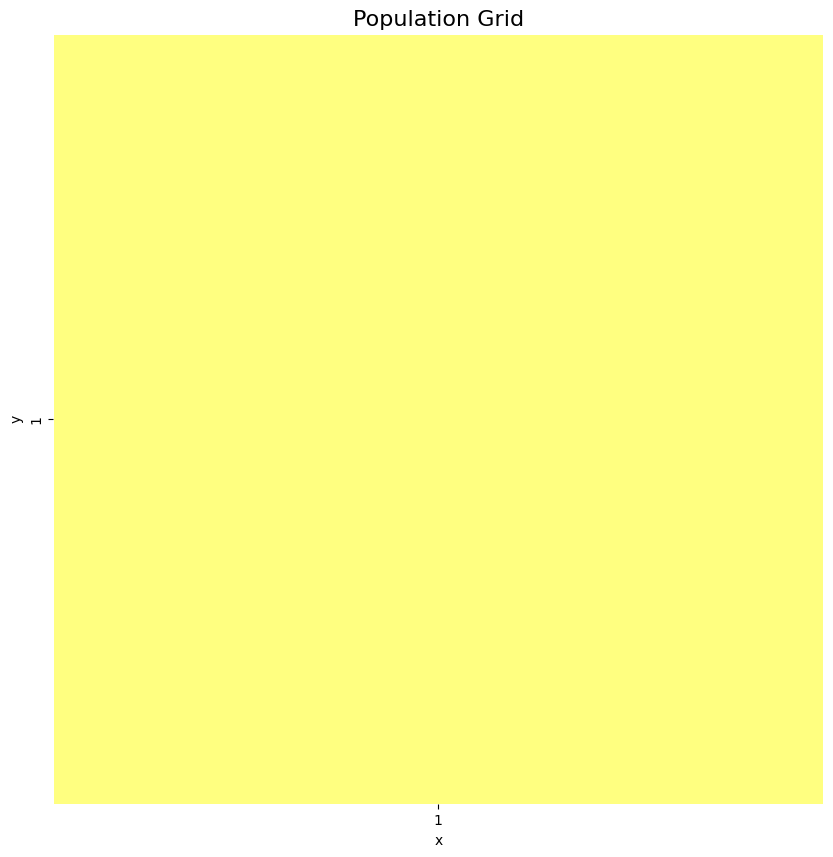

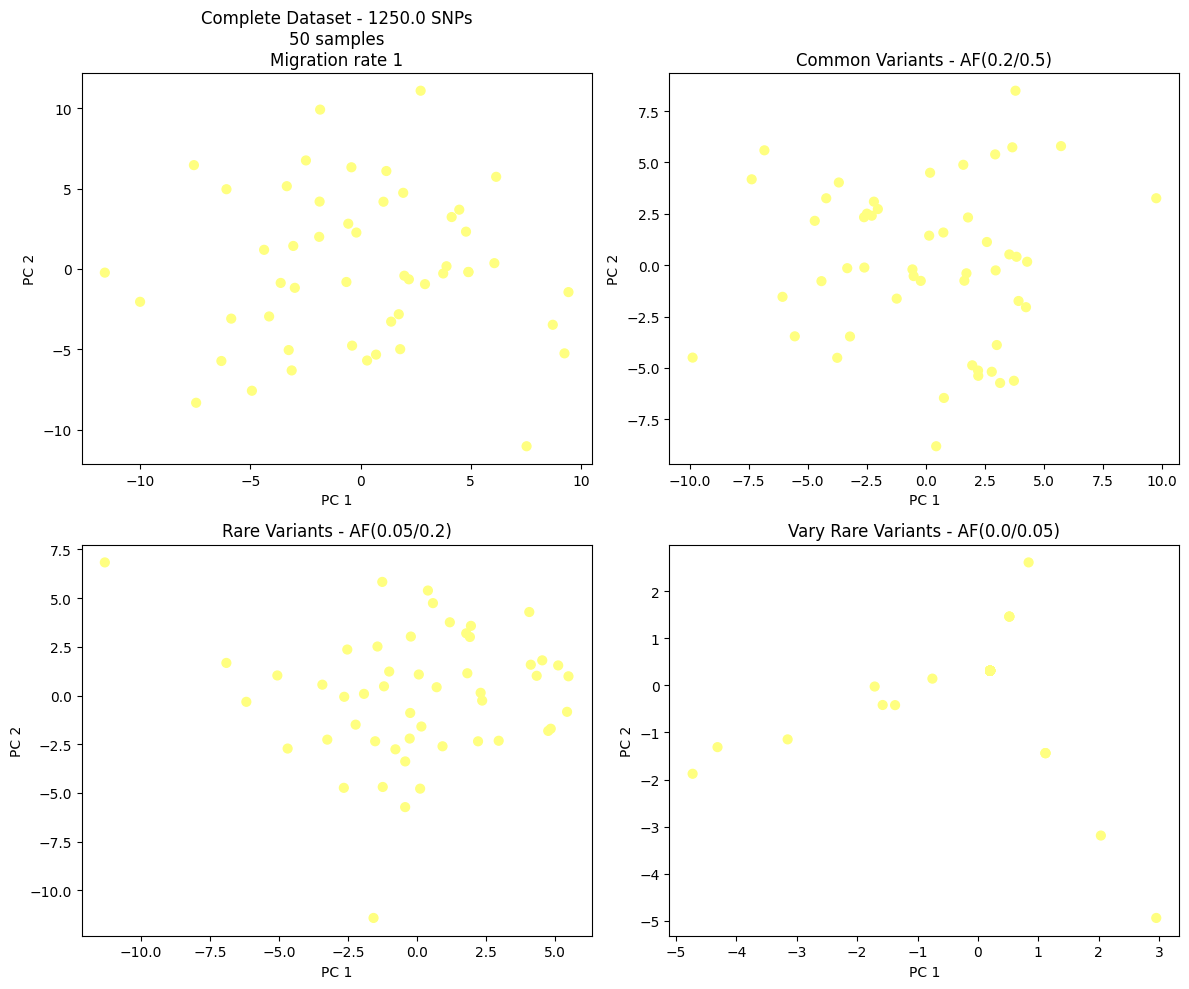

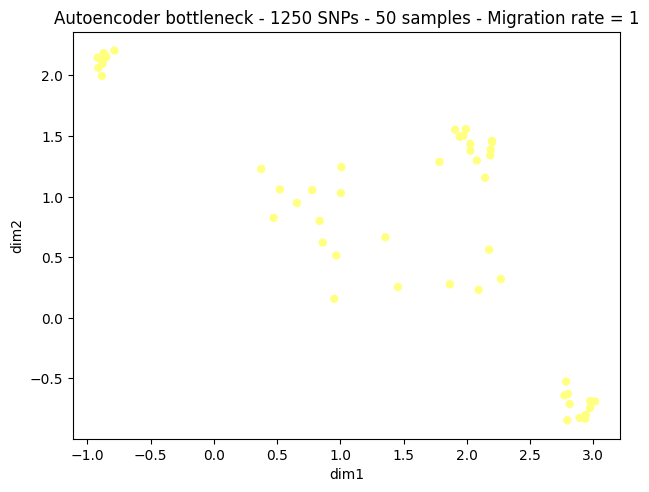

Time taken: 25.024 seconds


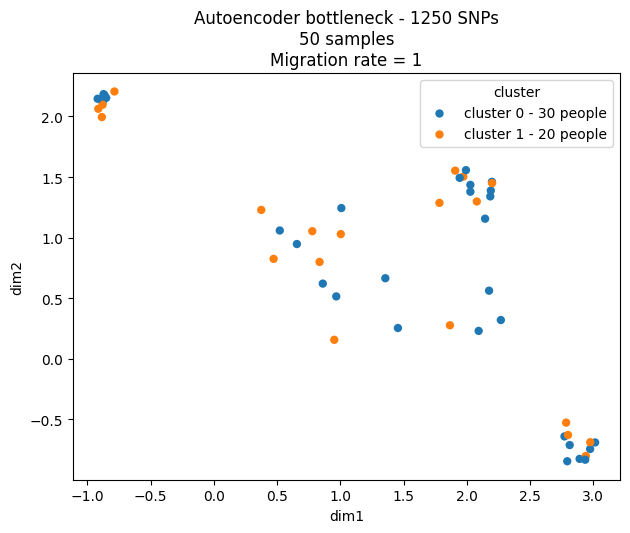

0
1


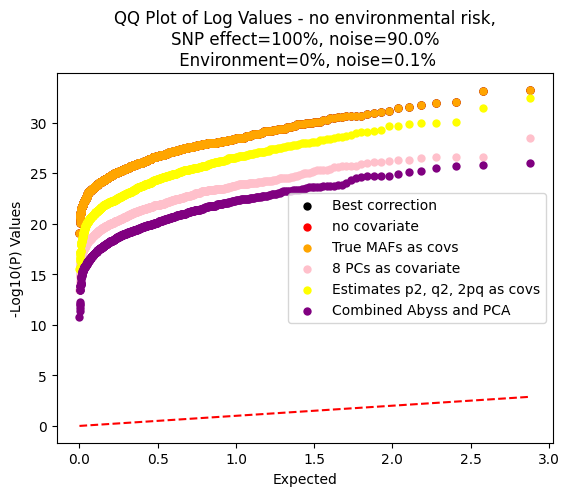

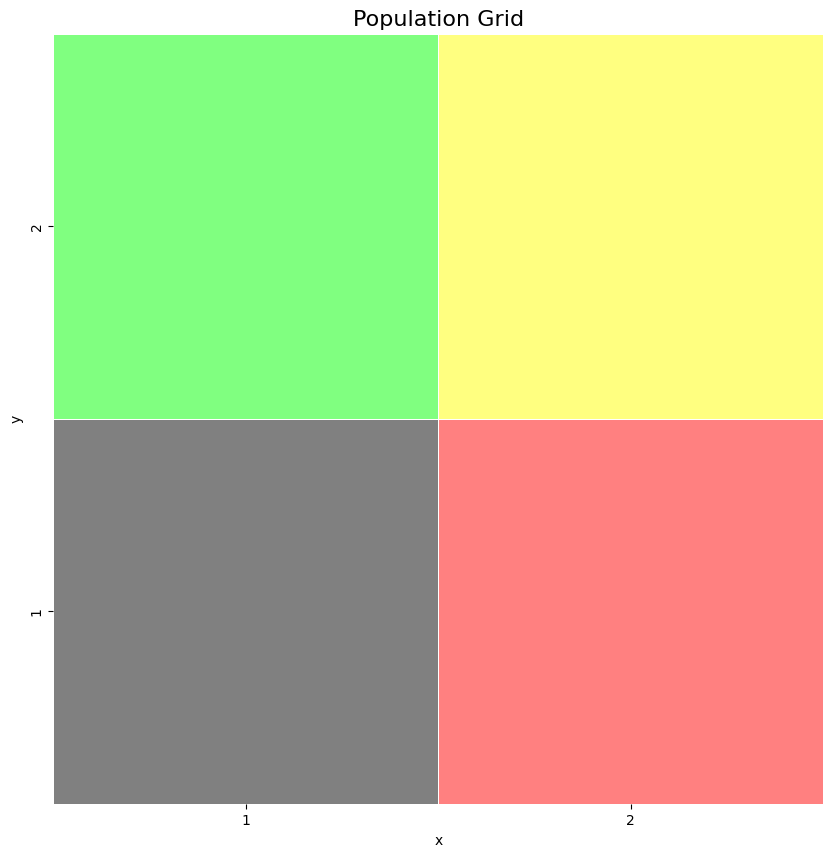

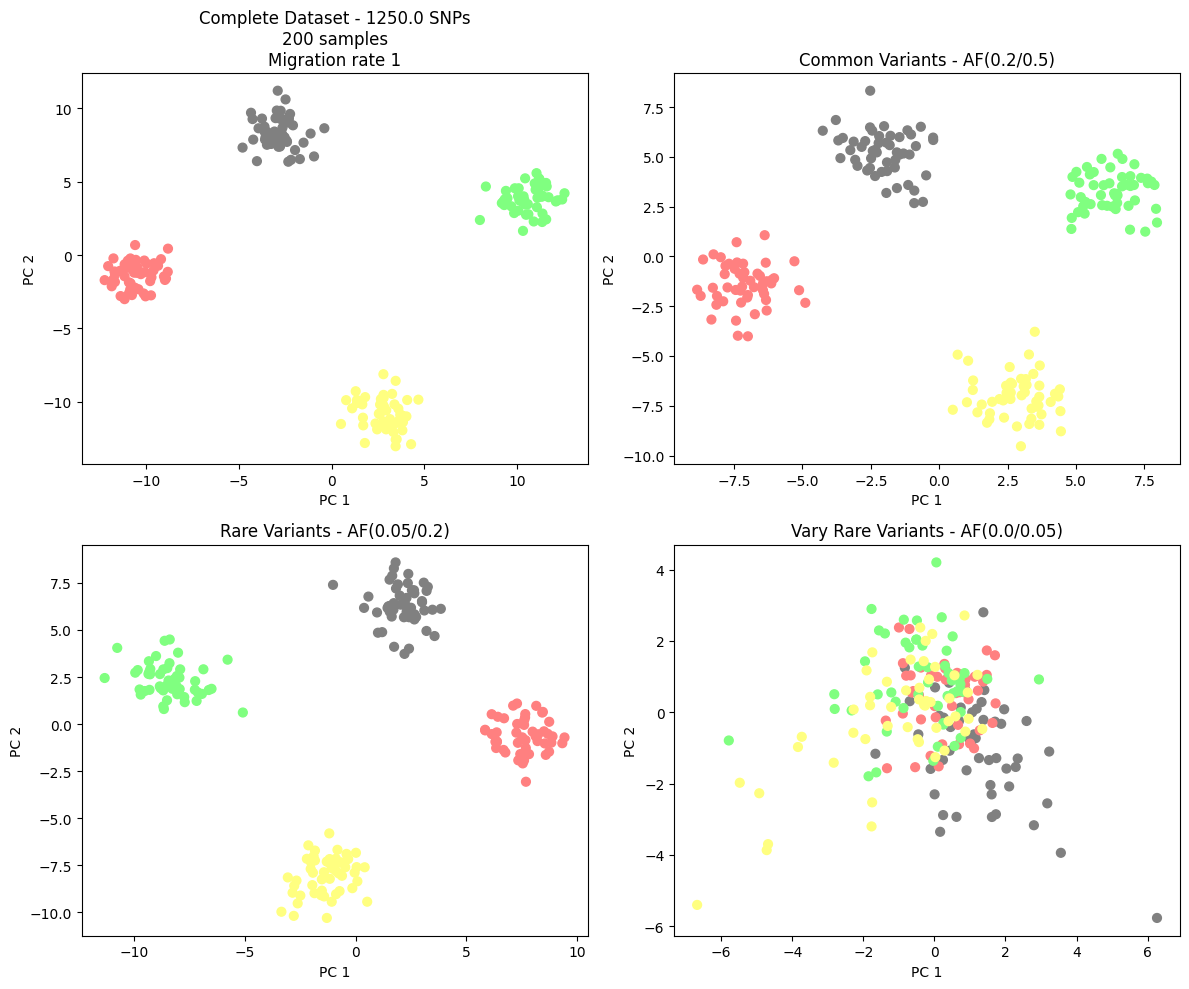

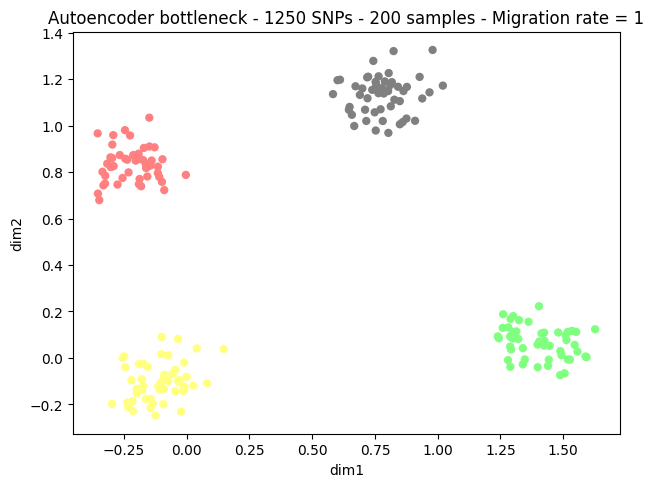

Time taken: 31.27 seconds


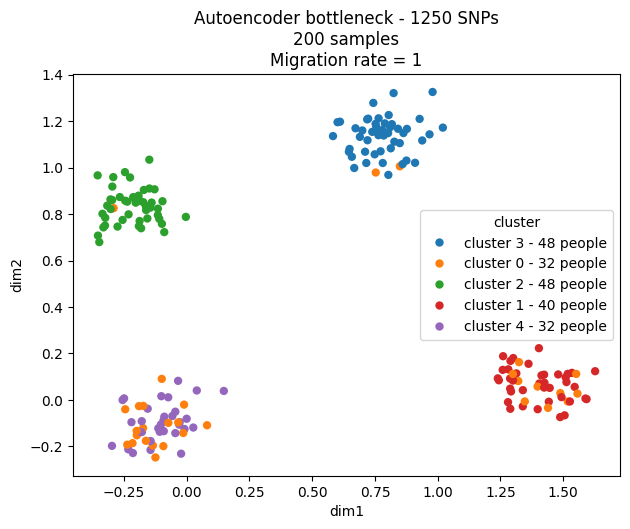

4
0
2
1
3


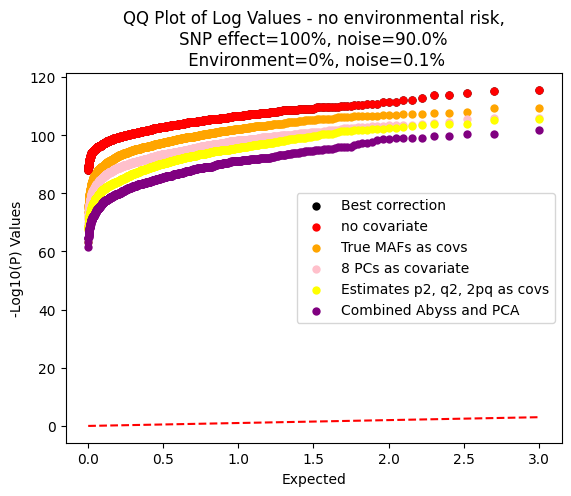

In [5]:
Ms = [1,3,5]
Ks = [1, 5, 10]

for M in Ms:
    for k in Ks:
        variables = {'M': M, 'k':k, 'to_analyze': 'complete', 'tools':tools,'scenarios':scenarios}
        run_notebook("01 Create Synthetic Genotype.ipynb", variables)
        run_notebook("02 Simulate population structure.ipynb", variables)
        run_notebook("03 Create and Visualise PCs.ipynb", variables)
        run_notebook("04 Simulate environmental risk.ipynb", variables)
        run_notebook("05 Abyss lower dimensionnality.ipynb", variables)
        run_notebook("06 Create LD blocks.ipynb", variables)
        run_notebook("07 Create MAF estimations.ipynb", variables)
        run_notebook("08 Concat esti mafs.ipynb", variables)
        run_notebook("09 full analysis loop.ipynb", variables)